In [84]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier  
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score



### part 1

import in data set removing the 'id' column and doing some checks on the dataset


In [85]:
#import data and removing the ID column
cvddata = pd.read_csv('cardio_train.csv', delimiter=";").drop('id', axis=1)
cvddata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [86]:
#check if data set have any missing values
cvddata.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [87]:
#check if dataset have any duplicated values.
cvddata.duplicated().sum()


24

In [88]:
# Dropping duplicate values
cvddata.drop_duplicates(inplace=True)
print("number of duplicated data after dropping :",cvddata.duplicated().sum())

number of duplicated data after dropping : 0


In [89]:
cvddata.describe()

#outliers are present due to unrealistic mean values and min/max values

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Part 2
We would need to convert our continuous data "age", "height", "weight", "ap_hi", "ap_lo" to be normally distributed to analyze trends
and identify outliers to filter our data

#Standardization is a preprocessing method used to transform continuous data 
#to make it look normally distributed. In scikit-learn, 
#this is often a necessary step, because many models assume that the data 
#you are training on is normally distributed, and if it isn't, 
#you risk biasing your model.

std_list = ["age", "height", "weight", "ap_hi", "ap_lo"] 

def standartization(x):
    x_std = x.copy(deep=True)
    for column in std_list:
        x_std[column] = (x_std[column] - x_std[column].mean()) / x_std[column].std() 
    return x_std

cvddata_std = standartization(cvddata)
cvddata_std.head()

### Part 2.1 
Now we will be showing the boxplot of our continuous data against cardio

In [90]:
# Diciding upper and lower bound 
ap_list = ['ap_hi', 'ap_lo']
cvddata_ap = pd.DataFrame(index=['lower_bound', 'upper_bound'])

for each in ap_list:
    Q1 = cvddata[each].quantile(0.25)
    Q3 = cvddata[each].quantile(0.75)
    IQR = Q3 - Q1
    
    lowr_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    cvddata_ap[each] = [lowr_bound, upper_bound]
    
cvddata_ap.head()

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [91]:
cvddata.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Melting data for multi box plot (basically lumping all the features to be compared into the features column so we can compare to cardio)
#cvdap = pd.melt(frame=cvddata_std, id_vars='cardio', value_vars=['ap_hi','ap_lo'], var_name='blood pressure', value_name='value', col_level=None)
#cvdap

Box plot
plt.figure(figsize=(12, 10))
sb.boxplot(x='blood pressure', y='value', hue='cardio', data=cvdap)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

<AxesSubplot:xlabel='cardio', ylabel='count'>

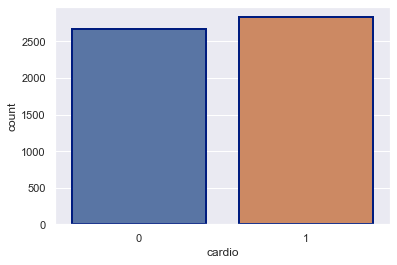

In [92]:
# Outlier rows
ap_hiH_filter = (cvddata['ap_hi'] > cvddata_ap['ap_hi'][1])
ap_loH_filter = (cvddata['ap_lo'] > cvddata_ap['ap_lo'][1])
ap_hiL_filter = (cvddata['ap_hi'] < cvddata_ap['ap_hi'][0])
ap_loL_filter = (cvddata['ap_lo'] < cvddata_ap['ap_lo'][0])
outlier_filter = (ap_hiH_filter | ap_loH_filter | ap_hiL_filter | ap_loL_filter)
cvddata_outlier = cvddata[outlier_filter]

# graph of outlier
sb.countplot(x='cardio', data=cvddata_outlier, linewidth=2, edgecolor=sb.color_palette("dark", 1))


# this shows the total amount of outliers are related to cardio. 
# this means roughly 2000+ cardio +ve have been identified as outlier results
# and approx 375 -ve identified due to outlier of ap_hi and ap_lo

In [93]:
cvddata.shape

(69976, 12)

In [94]:
# taking less than 250 in ap_hi and less than 200 in ap_lo
outlier_filter = ((cvddata["ap_hi"]>240) | (cvddata["ap_hi"]<60)| (cvddata["ap_lo"]>160)| (cvddata["ap_lo"]<30) )
cvddata = cvddata[~outlier_filter]
cvddata.shape

# this removes all of the outlier data that are higher than the stated value
# of aphi > 250 and aplo >200 as seen from ap_hi and ap_lo
# approx 1000 rows removed that are wayyy off from the boundary mentioned above
# value of 
# upper boundary of aphi is 170 remove 240 onwards
# upper boundary of allo is 105 remove 180 onwards
# lower boundary of aphi is 90 remove 
# lower boundary of allo is 65 remove 

(68745, 12)

### next up, we will tidy up the age, gender, height, weight.

In [95]:
# this converts the age from days into years, gender from '1&2' into 0 & 1 for standardization
# added a new column 'bmi' for better data association.
cvddata['age'] = (cvddata['age']/365).round().astype('int')
cvddata['gender'] = cvddata['gender'].apply(lambda x: 0 if x==1 else 1)
cvddata['bmi'] = (cvddata['weight'] / (cvddata['height']/100)**2).round(2)
cvddata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.93
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.51
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.71
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.01


### Now I am going to classify the blood pressure aphi & aplo into catergorical data

normal/elevated = 1\
high blood pressure (hypertension stage 1) = 2\
high blood pressure (hypertension stage 2) = 3\
HYPERTENSIVE CRISIS (CONSULT DOCTOR NOW) = 4

In [96]:


def aphi_func(x):
        
    if x <= 129:
         return 1
        
    if x >129 and x<= 139:
         return 2
    if x >139 and x<= 180:
         return 3    
    else:
         return 4
        
def aplo_func(x):
    if x <= 80:
         return 1
        
    if x > 80  and x <= 89:
         return 2
        
    if x >90 and x<= 120:
         return 3
    
    else:
         return 4

In [34]:
#this implements the function onto the column of choice.

cvddata['aphi_class'] = cvddata['ap_hi'].apply(lambda x: aphi_func(x))
cvddata['aplo_class'] = cvddata['ap_lo'].apply(lambda x: aplo_func(x))

cvddata['BP']=cvddata[['aphi_class','aplo_class']].max(axis=1)
cvddata

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,aphi_class,aplo_class,BP
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.97,1,1,1
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.93,3,4,4
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.51,2,1,2
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.71,3,3,3
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.01,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,1,168,76.0,120,80,1,1,1,0,1,0,26.93,1,1,1
69996,62,0,158,126.0,140,90,2,2,0,0,1,1,50.47,3,4,4
69997,52,1,183,105.0,180,90,3,1,0,1,0,1,31.35,3,4,4
69998,61,0,163,72.0,135,80,1,2,0,0,0,1,27.10,2,1,2


Number of cardio : 34023
1    12331
4    10963
3     7463
2     3266
Name: BP, dtype: int64


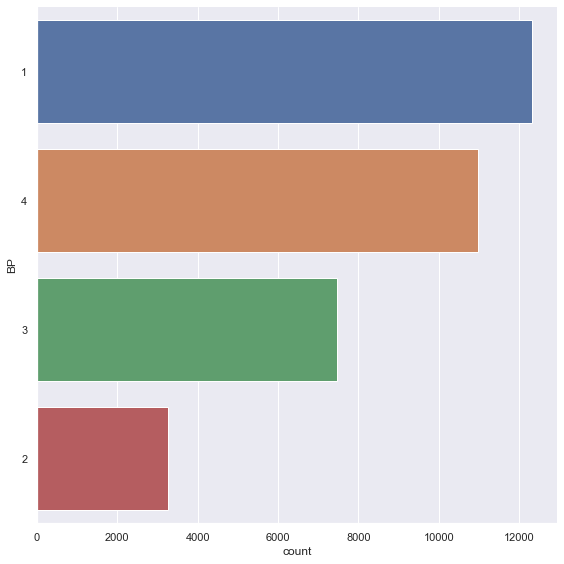

In [99]:
# number of cardio +ve in the Dataset
cardiodata = cvddata[cvddata["cardio"] == True]
print("Number of cardio :", len(cardiodata))

# number of Cardio +ve in each BP type
print(cardiodata["BP"].value_counts())
sb.catplot(y = "BP", data = cardiodata, kind = "count", 
           order = cardiodata["BP"].vcalue_counts().index, height = 8)

In [100]:
# Melting data for multi box plot (basically lumping all the features to be compared
# into the features column so we can compare to cardio)
cvddata_melt = pd.melt(frame=cvddata, id_vars='cardio', value_vars=std_list, var_name='features', value_name='value', col_level=None)
cvddata_melt

,cardio,features,value
0,0,age,50.0
1,1,age,55.0
2,1,age,52.0
3,1,age,48.0
4,0,age,48.0
...,...,...,...
343720,0,ap_lo,80.0
343721,1,ap_lo,90.0
343722,1,ap_lo,90.0
343723,1,ap_lo,80.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'ap_hi'),
  Text(4, 0, 'ap_lo')])

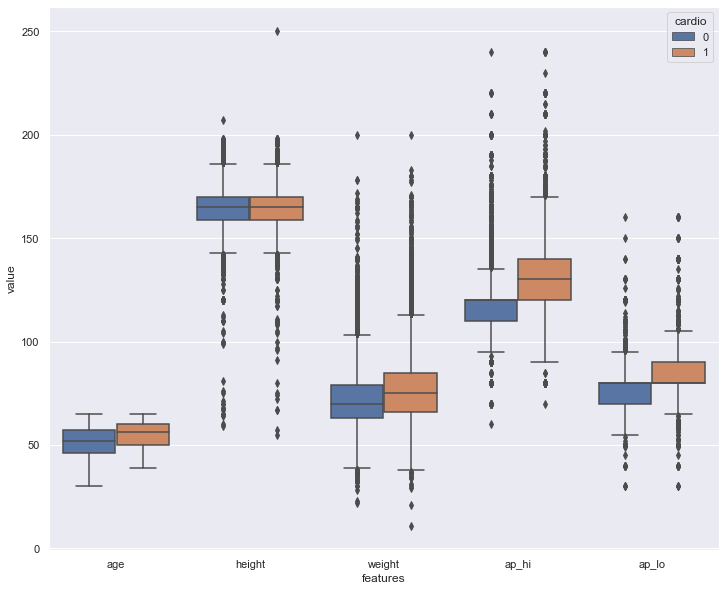

In [105]:
# Box plot
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='cardio', data=cvddata_melt)
plt.xticks(rotation=0)

In [102]:
# compare to smoke
cvddata_melts = pd.melt(frame=cvddata, id_vars='smoke', value_vars=std_list, var_name='features', value_name='value', col_level=None)
# compare to alco
cvddata_melta = pd.melt(frame=cvddata, id_vars='alco', value_vars=std_list, var_name='features', value_name='value', col_level=None)
# compare to active
cvddata_meltac = pd.melt(frame=cvddata, id_vars='active', value_vars=std_list, var_name='features', value_name='value', col_level=None)
# compare to cholesterol
cvddata_meltc = pd.melt(frame=cvddata, id_vars='cholesterol', value_vars=std_list, var_name='features', value_name='value', col_level=None)
# compare to gluc
cvddata_meltg = pd.melt(frame=cvddata, id_vars='gluc', value_vars=std_list, var_name='features', value_name='value', col_level=None)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'ap_hi'),
  Text(4, 0, 'ap_lo')])

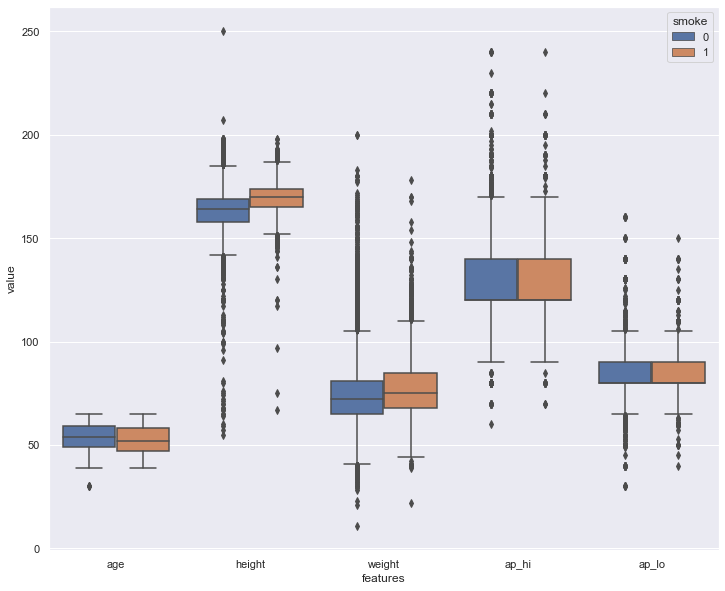

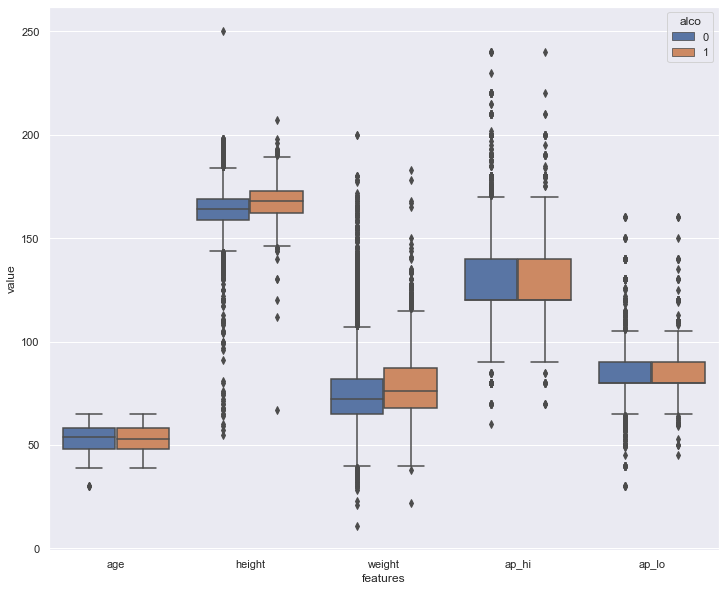

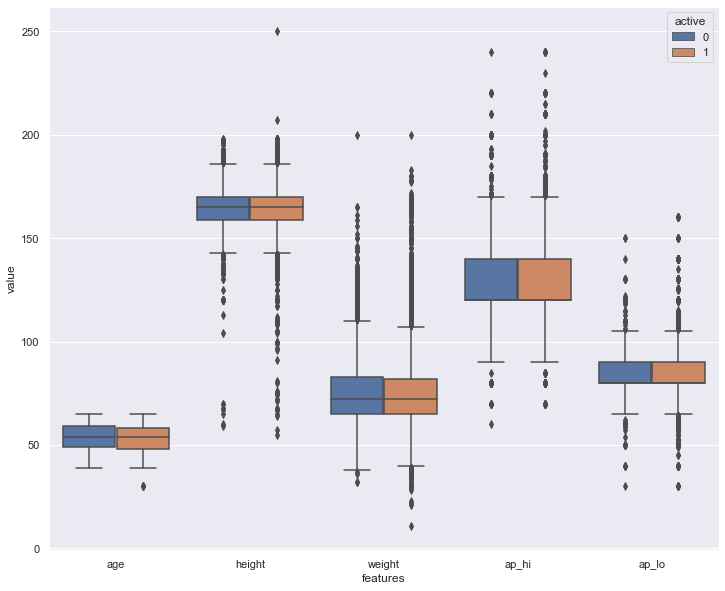

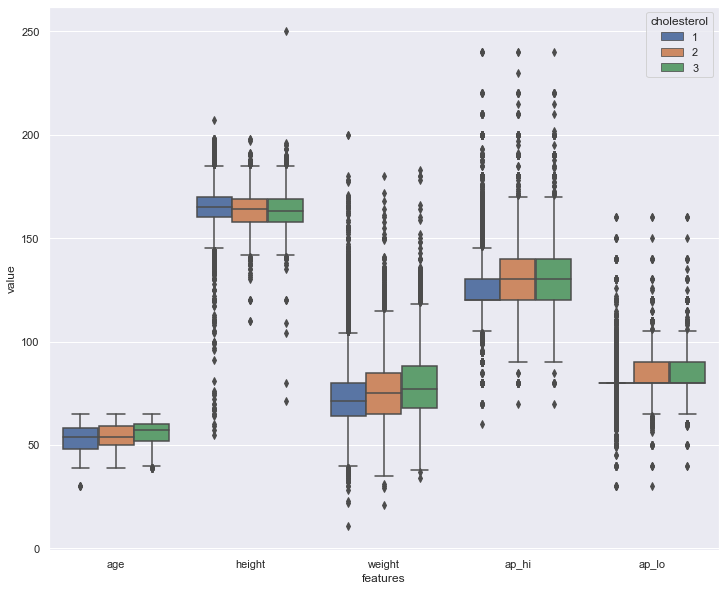

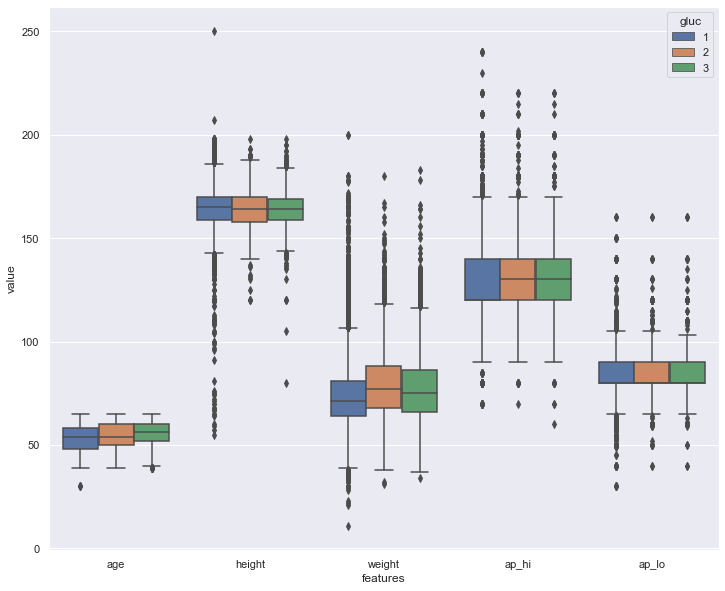

In [103]:
# Box plot for smoke
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='smoke', data=cvddata_melts)
plt.xticks(rotation=0)

# Box plot for alco
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='alco', data=cvddata_melta)
plt.xticks(rotation=0)
# Box plot for active
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='active', data=cvddata_meltac)
plt.xticks(rotation=0)
# Box plot for cholesterol
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='cholesterol', data=cvddata_meltc)
plt.xticks(rotation=0)
# Box plot for gluc
plt.figure(figsize=(12, 10))
sb.boxplot(x='features', y='value', hue='gluc', data=cvddata_meltg)
plt.xticks(rotation=0)

# part 3
since we identified blood pressure is heavily linked to cardio, we identify the possible predictors of high blood pressure.

In [106]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(cvddata[["age", "height", "weight", "ap_hi", "ap_lo"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,age,height,weight,ap_hi,ap_lo
count,68745.00,68745.00,68745.00,68745.00,68745.00
mean,53.33,164.36,74.13,126.62,81.36
std,6.77,8.19,14.33,16.76,9.61
min,30.00,55.00,11.00,60.00,30.00
25%,48.00,159.00,65.00,120.00,80.00
50%,54.00,165.00,72.00,120.00,80.00
75%,58.00,170.00,82.00,140.00,90.00
max,65.00,250.00,200.00,240.00,160.00


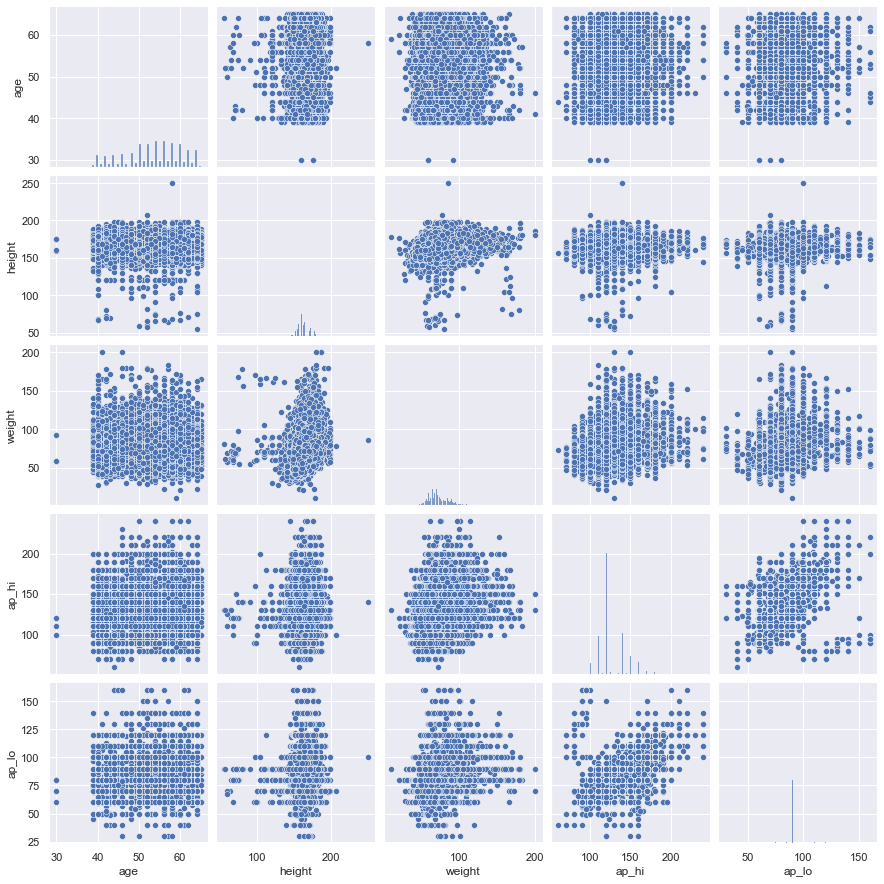

In [107]:
# Draw pairs of variables against one another
sb.pairplot(data = numeric_data)

             age    height    weight     ap_hi     ap_lo
age     1.000000 -0.081371  0.054570  0.208632  0.153315
height -0.081371  1.000000  0.291859  0.018481  0.035835
weight  0.054570  0.291859  1.000000  0.269249  0.250342
ap_hi   0.208632  0.018481  0.269249  1.000000  0.702045
ap_lo   0.153315  0.035835  0.250342  0.702045  1.000000


<AxesSubplot:>

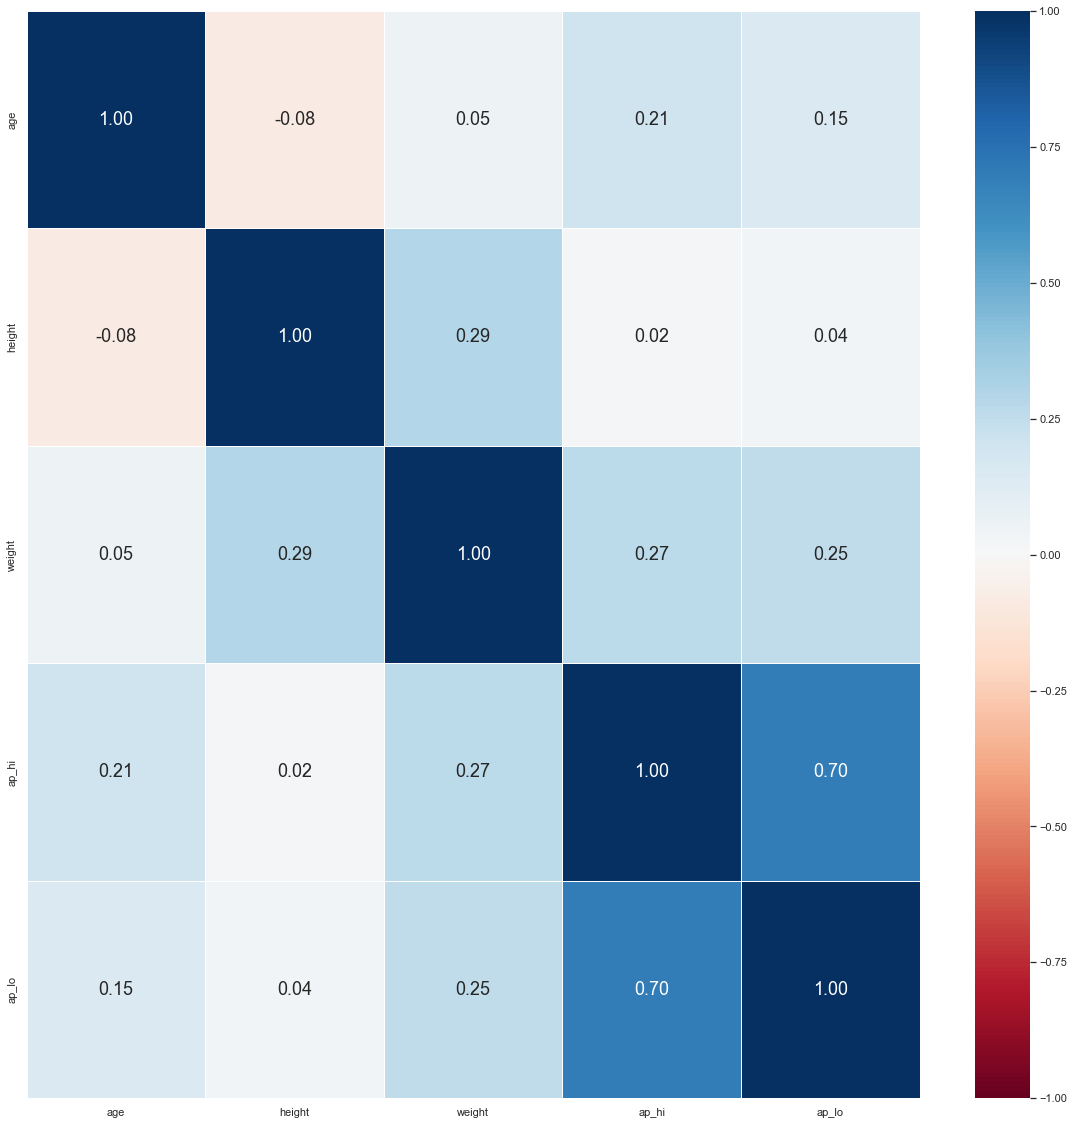

In [108]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

    aphi_class  aplo_class  weight
13           4           3   86.08
14           4           4   84.12
10           3           3   81.56
9            3           2   81.48
5            2           2   79.59
6            2           3   79.46
11           3           4   78.67
2            1           3   78.61
7            2           4   78.47
1            1           2   77.74


<AxesSubplot:xlabel='aplo_class', ylabel='aphi_class'>

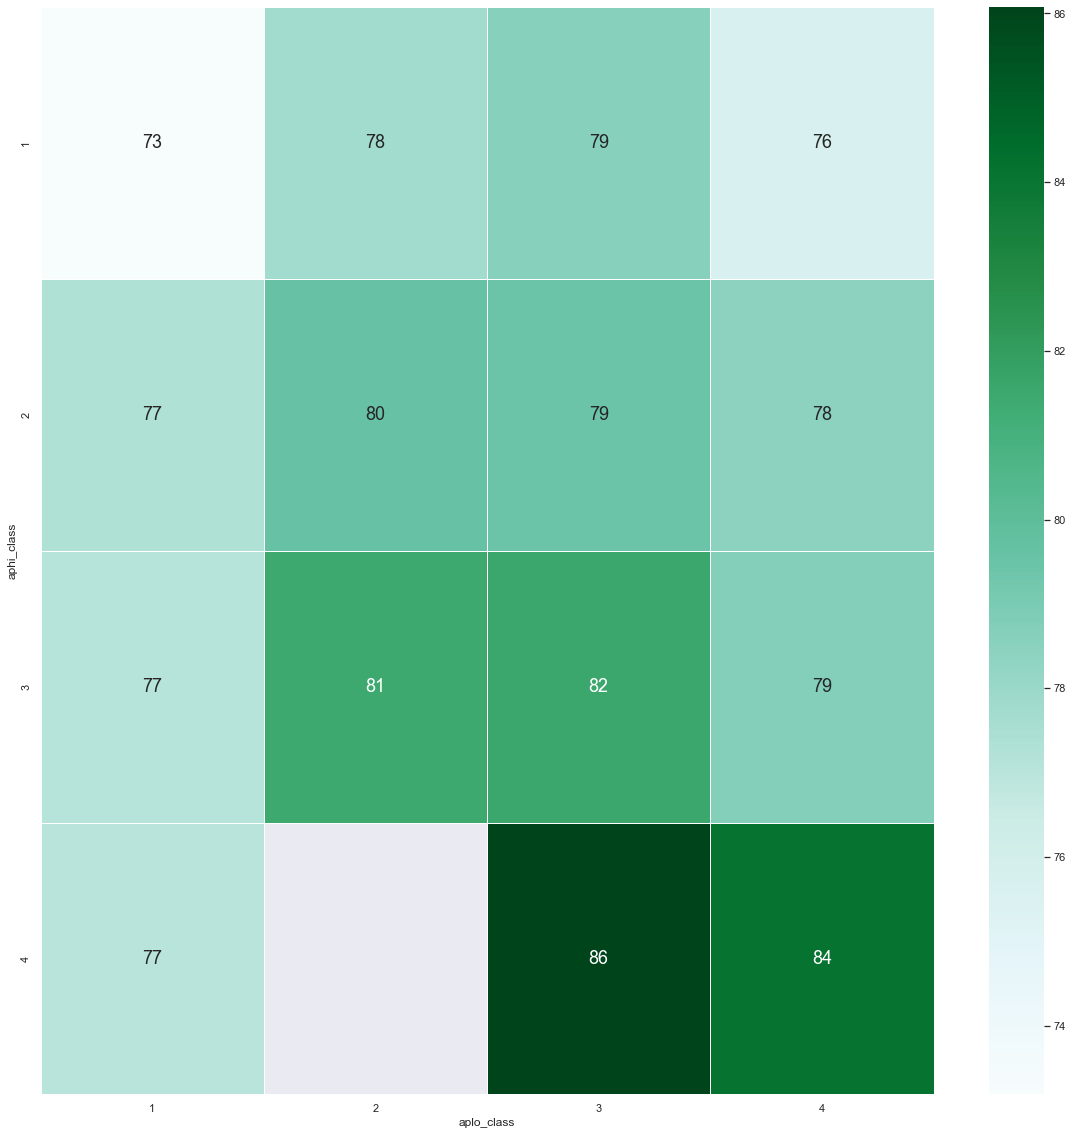

In [109]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = cvddata[cvddata["cardio"] == True].groupby(['aphi_class', 'aplo_class']).mean().loc[:, 'weight']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('weight', ascending=False).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

    aphi_class  aplo_class  weight
0            1           1   73.19
3            1           4   75.69
12           4           1   77.03
8            3           1   77.07
4            2           1   77.33
1            1           2   77.74
7            2           4   78.47
2            1           3   78.61
11           3           4   78.67
6            2           3   79.46


<AxesSubplot:xlabel='aplo_class', ylabel='aphi_class'>

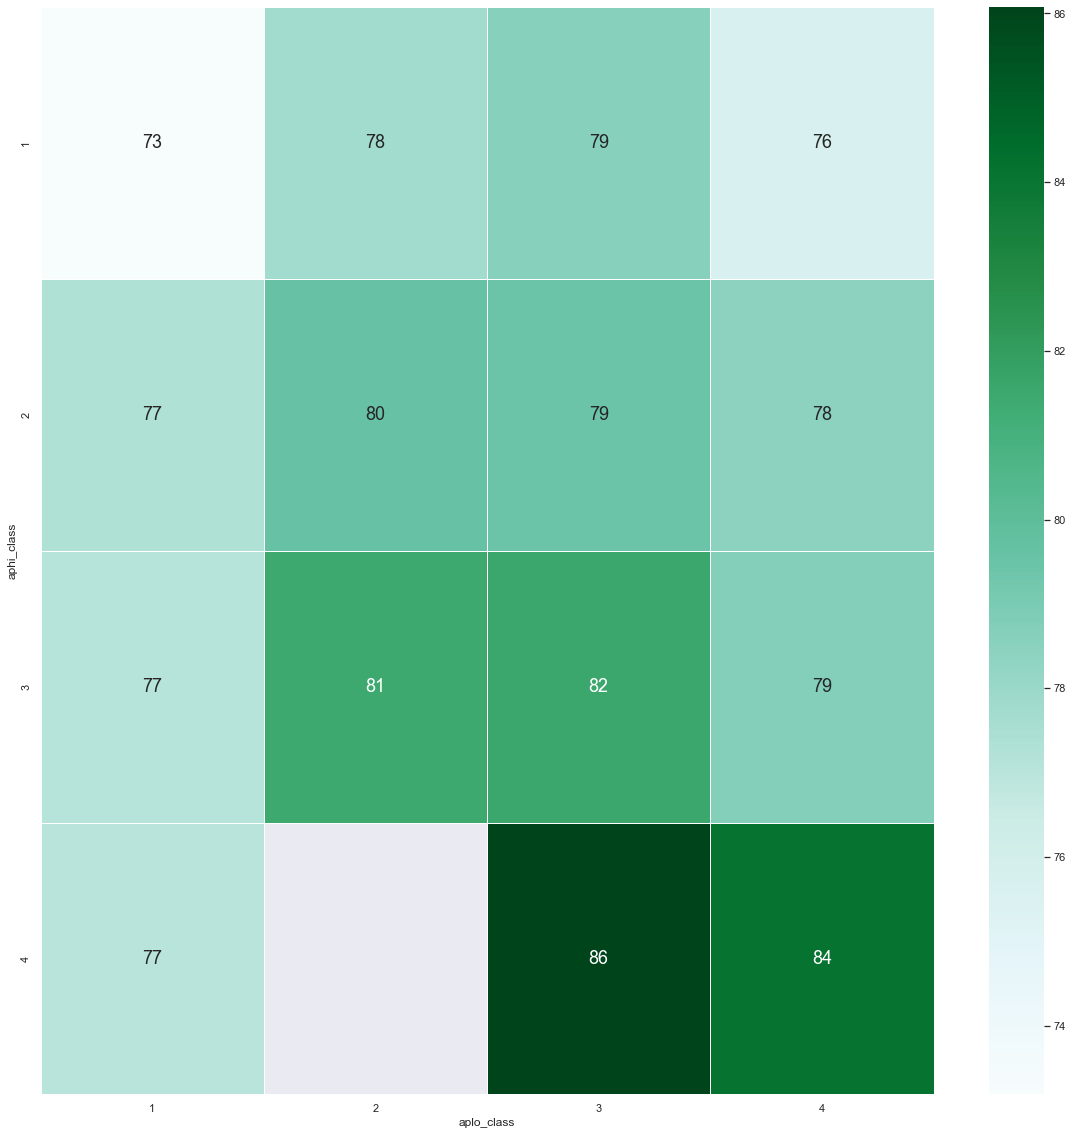

In [115]:
# Compute the Average TOTAL across every pair of TYPEs
total_means = cvddata[cvddata["cardio"] == True].groupby(['aphi_class', 'aplo_class']).mean().loc[:, 'weight']

# Strongest Pokemons in each Pair of Types -- the Top 10
print(total_means.reset_index().sort_values('weight', ascending=True).head(10).round(2))

# Heatmap of Average TOTAL across every pair of TYPEs
f = plt.figure(figsize=(20, 20))
sb.heatmap(total_means.unstack(), linewidths = 1,
           annot = True, fmt = ".0f", annot_kws = {"size": 18}, cmap = "BuGn")

In [116]:
total_means.describe()

count    15.000000
mean     79.072053
std       3.237200
min      73.185654
25%      77.200030
50%      78.612245
75%      80.534205
max      86.075562
Name: weight, dtype: float64

In [117]:
cvddata.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,aphi_class,aplo_class,BP
count,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.00000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000,68745.000000
mean,53.326729,0.348840,164.361859,74.125238,126.615536,81.361379,1.364856,1.226009,0.08805,0.053618,0.803375,0.494916,27.523836,1.675700,1.782253,1.984362
std,6.767801,0.476607,8.186343,14.333354,16.756950,9.606400,0.679074,0.571994,0.28337,0.225265,0.397449,0.499978,6.051026,0.879195,1.253144,1.245580
min,30.000000,0.000000,55.000000,11.000000,60.000000,30.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,3.470000,1.000000,1.000000,1.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,23.880000,1.000000,1.000000,1.000000
50%,54.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,26.350000,1.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.00000,0.000000,1.000000,1.000000,30.120000,3.000000,3.000000,3.000000
max,65.000000,1.000000,250.000000,200.000000,240.000000,160.000000,3.000000,3.000000,1.00000,1.000000,1.000000,1.000000,298.670000,4.000000,4.000000,4.000000


# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(traintarget)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

In [126]:
# Extract Response and Predictors
y = pd.DataFrame(cvddata[["ap_hi","ap_lo"]])
X = pd.DataFrame(cvddata[["age","height","weight"]])

In [127]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (51558, 2) (51558, 3)
Test Set  : (17187, 2) (17187, 3)


In [128]:
# Summary Statistics for Response
y_train.describe()

,ap_hi,ap_lo
count,51558.000000,51558.000000
mean,126.640967,81.372474
std,16.735365,9.565467
min,70.000000,30.000000
25%,120.000000,80.000000
50%,120.000000,80.000000
75%,140.000000,90.000000
max,240.000000,160.000000


In [129]:
# Summary Statistics for Response
X_train.describe()

,age,height,weight
count,51558.000000,51558.000000,51558.000000
mean,53.321017,164.367431,74.125192
std,6.766792,8.123586,14.340088
min,30.000000,55.000000,11.000000
25%,48.000000,159.000000,65.000000
50%,54.000000,165.000000,72.000000
75%,58.000000,170.000000,82.000000
max,65.000000,198.000000,200.000000


<AxesSubplot:>

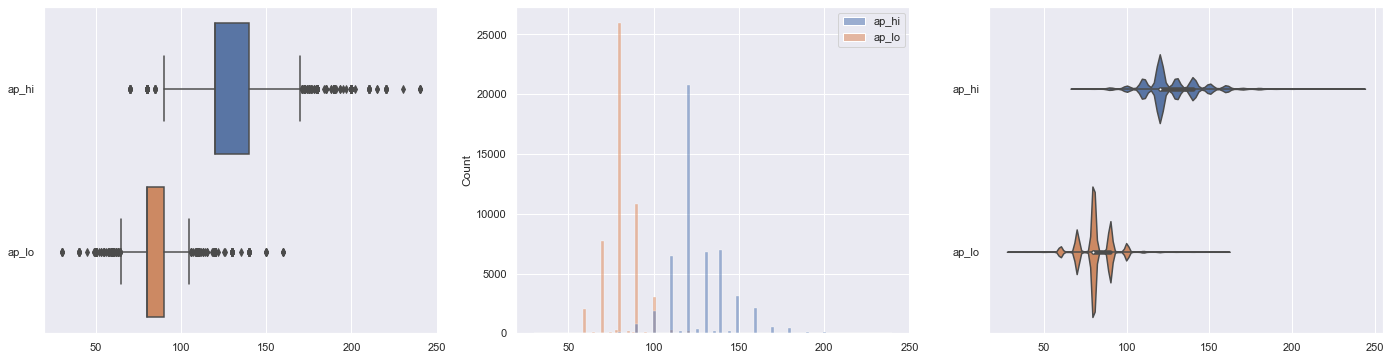

In [130]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])